### Importação dos dados



In [15]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = [loja1, loja2, loja3, loja4]

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


Nesta primeira análise, você deve calcular o **faturamento total** de cada loja. Somando os valores da coluna Preço de cada **loja** para estimar o faturamento

In [16]:
f, n = 0, 1

faturamento = []
for loja in lojas:
  f = loja["Preço"].sum()
  faturamento.append(f)
  print(f"Loja {n} Faturamento ${f}")
  n += 1

print(f"\nFaturamento Total: ${sum(faturamento)}")

Loja 1 Faturamento $1534509.12
Loja 2 Faturamento $1488459.06
Loja 3 Faturamento $1464025.03
Loja 4 Faturamento $1384497.58

Faturamento Total: $5871490.79


# 2. Vendas por Categoria


Neste passo, deve calcular a **quantidade de produtos vendidos** por **categoria** em cada loja. A ideia é agrupar os dados por categoria e contar o número de vendas de cada tipo, mostrando **as categoria mais populares** de cada loja

In [18]:
lojas = [loja1, loja2, loja3, loja4]
n = 1
for loja in lojas:
    categoriaProduto = loja["Categoria do Produto"].value_counts()
    print(f"Produtos mais vendidos por Categoria na Loja {n}\n{categoriaProduto}\n")
    n += 1

Produtos mais vendidos por Categoria na Loja 1
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Produtos mais vendidos por Categoria na Loja 2
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Produtos mais vendidos por Categoria na Loja 3
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Produtos mais vendi

# 3. Média de Avaliação das Lojas

Neste passo, vamos calcular a média das avaliações dos clientes para cada loja. O objetivo é **entender a satisfação dos clientes com os produtos vendidos**

In [21]:
import pandas as pd

lojas = {
    "Loja 1": loja1,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

medias = {}
for nome, df in lojas.items():
    try:
        if "Avaliação da compra" not in df.columns:
            raise KeyError(f"Coluna não encontrada em {nome}")

        df_validado = df[(df["Avaliação da compra"] >= 1) & (df["Avaliação da compra"] <= 5)]
        media = df_validado["Avaliação da compra"].mean().round(2)

    except KeyError as e:
        print(f"Erro: {e}")
        media = 0.0

    medias[nome] = media
    print(f"{nome}: Média de Avaliação = {media}/5")

media_geral = sum(medias.values()) / len(medias) if len(medias) > 0 else 0
print(f"\nMédia geral consolidada: {media_geral:.2f}/5")

Loja 1: Média de Avaliação = 3.98/5
Loja 2: Média de Avaliação = 4.04/5
Loja 3: Média de Avaliação = 4.05/5
Loja 4: Média de Avaliação = 4.0/5

Média geral consolidada: 4.02/5


# 4. Produtos Mais e Menos Vendidos

Neste passo, deve identificar quais produtos foram os mais vendidos e os menos vendidos em cada loja.  Ao final, visualize os resultados de forma que fique claro quais produtos se destacaram nas vendas de cada loja

In [23]:
print(f"""
Produto mais vendido na loja 1: "{loja1["Produto"].value_counts().idxmax()}" e produto menos vendido loja 1: "{loja1["Produto"].value_counts().idxmin()}"
Produto mais vendido na loja 2: "{loja2["Produto"].value_counts().idxmax()}" e produto menos vendido loja 2: "{loja2["Produto"].value_counts().idxmin()}"
Produto mais vendido na loja 3: "{loja3["Produto"].value_counts().idxmax()}" e produto menos vendido loja 3: "{loja3["Produto"].value_counts().idxmin()}"
Produto mais vendido na loja 4: "{loja4["Produto"].value_counts().idxmax()}" e produto menos vendido loja 4: "{loja4["Produto"].value_counts().idxmin()}"
""")


Produto mais vendido na loja 1: "Micro-ondas" e produto menos vendido loja 1: "Headset"
Produto mais vendido na loja 2: "Iniciando em programação" e produto menos vendido loja 2: "Jogo de tabuleiro"
Produto mais vendido na loja 3: "Kit banquetas" e produto menos vendido loja 3: "Blocos de montar"
Produto mais vendido na loja 4: "Cama box" e produto menos vendido loja 4: "Guitarra"



# 5. Frete Médio por Loja


Neste passo, vamos calcular o custo médio de frete para cada loja. O objetivo é entender quanto, em média, está sendo gasto com frete para cada uma das lojas

In [24]:
lojas = [loja1, loja2, loja3, loja4]

for indice, loja in enumerate(lojas, start=1):
    frete_medio = loja["Frete"].mean()
    print(f'Loja {indice} - Frete Médio: ${round(frete_medio, 2)}')

Loja 1 - Frete Médio: $34.69
Loja 2 - Frete Médio: $33.62
Loja 3 - Frete Médio: $33.07
Loja 4 - Frete Médio: $31.28


# **Criar gráficos para visualização**
Decida quais tipos de gráficos usar para apresentar os resultados de maneira clara e visual.

**Mínimo de 3 gráficos diferentes**, que podem incluir gráficos de barras, pizza, dispersão, entre outros.

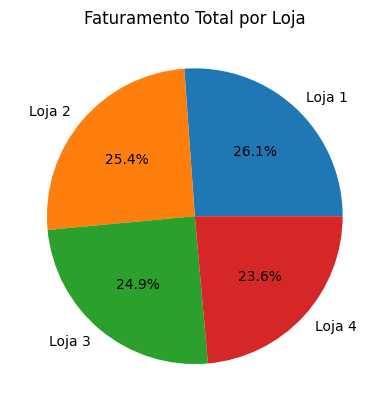

In [31]:
import matplotlib.pyplot as plt
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

x = nomes_lojas
y = faturamento

plt.pie(y, labels=x, autopct='%1.1f%%')

plt.title("Faturamento Total por Loja")
plt.show()

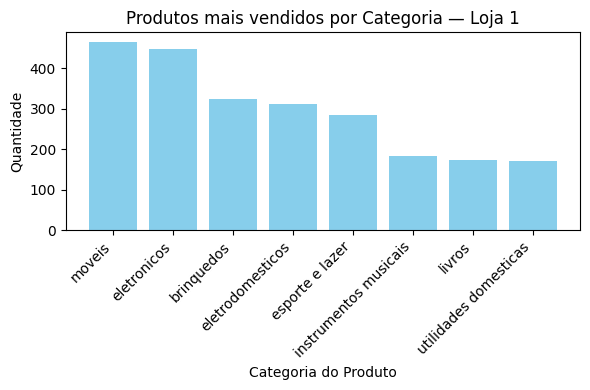

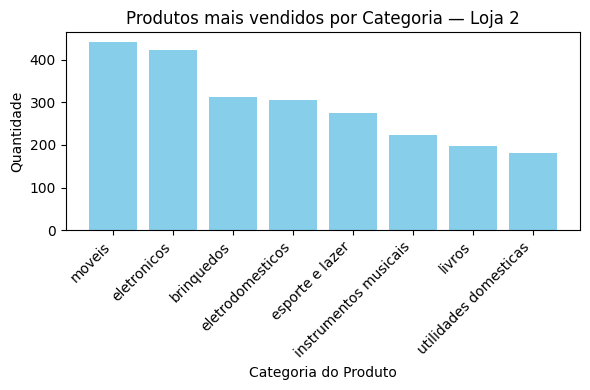

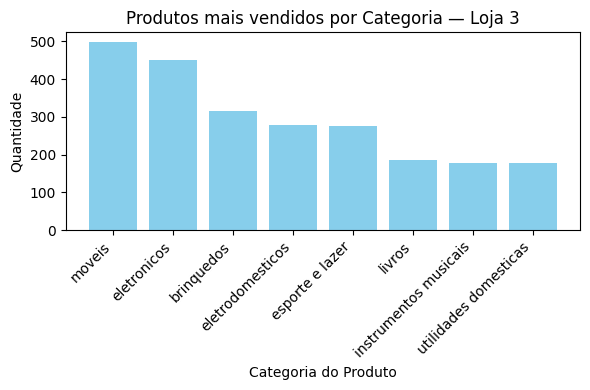

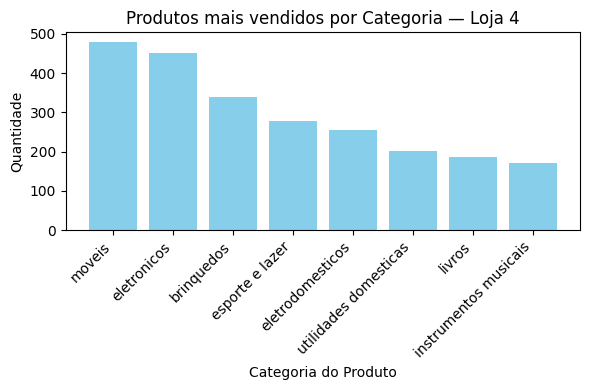

In [ ]:
import matplotlib.pyplot as plt

lojas = [loja1, loja2, loja3, loja4]
for i, loja in enumerate(lojas, start=1):
    vc = loja["Categoria do Produto"].value_counts()

    plt.figure(figsize=(6,4))
    plt.bar(vc.index, vc.values, color='skyblue')
    plt.title(f'Produtos mais vendidos por Categoria — Loja {i}')
    plt.xlabel('Categoria do Produto')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


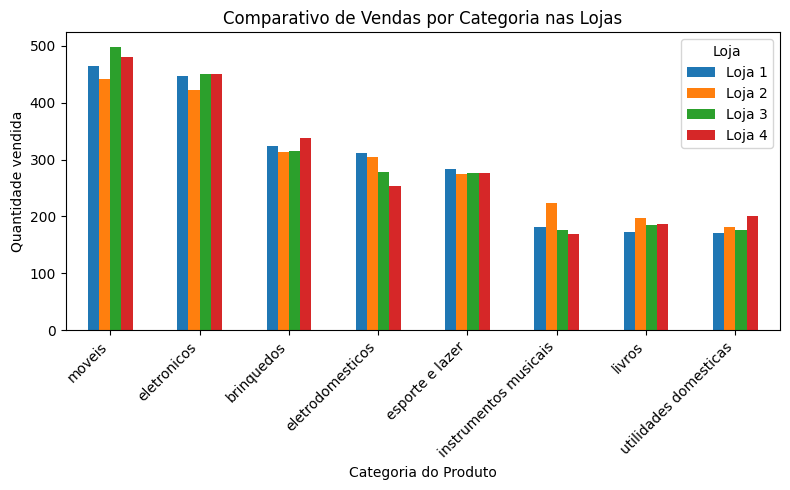

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dfs = []
for i, loja in enumerate(lojas, start=1):
    vc = loja["Categoria do Produto"].value_counts().rename(f'Loja {i}')
    dfs.append(vc)

comparativo = pd.concat(dfs, axis=1).fillna(0).astype(int)

comparativo.plot(kind='bar', figsize=(8,5))
plt.title('Comparativo de Vendas por Categoria nas Lojas')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade vendida')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()


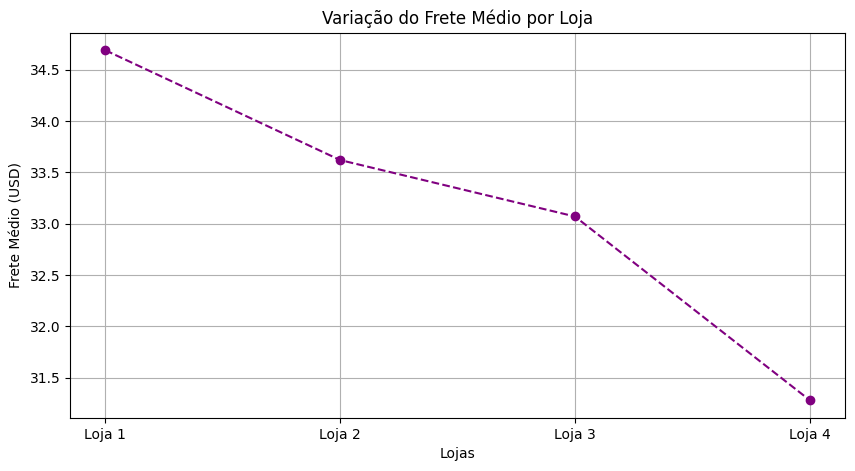

In [ ]:
frete_medio = [34.69, 33.62, 33.07, 31.28]

plt.figure(figsize=(10, 5))
plt.plot(nomes_lojas, frete_medio, marker='o', linestyle='--', color='purple')
plt.title('Variação do Frete Médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio (USD)')
plt.grid(True)
plt.show()

# **Análise da Pior Loja (Loja 4)**
**Identificação da Pior Loja**

*   **Faturamento Total:** A Loja 4 apresenta o menor faturamento (23.6%), sendo a pior em vendas comparada às demais.
*   **Frete Médio:** Também possui o menor frete médio ($31.28), sugerindo produtos mais baratos ou estratégias de frete diferenciadas.
